## **MACHINE LEARNING ASSIGNMENT 08**

IMAAD IMRAN HAJWANE  
202101132 / 21  
LY - 7th SEMESTER  
TOPIC: IMPLEMENTATION OF TRANSFER LEARNING ALGORITHM  

###### IMPORTING LIBRARIES

In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
# from keras.applications.mobilenet_v2 import MobileNetV2
# from keras.applications.xception import Xception
# from keras.applications.efficientnet import EfficientNetB0
# from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
from keras.optimizers import Adam
from keras import models as tf_models, layers
import matplotlib.pyplot as plt
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
import warnings
warnings.filterwarnings("ignore")


In [2]:
models = [
    'VGG16',
    'ResNet50',
    'InceptionV3'
]


In [3]:
train_data_dir = r'Train_test\train'
validation_data_dir = r'Train_test\validation'
test_data_dir = r'Train_test\test'


In [4]:
bs = 32
iz = 224

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    shuffle=True,
    seed=16,
    image_size=(iz, iz),
    batch_size=bs,
)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    shuffle=True,
    seed=16,
    image_size=(iz, iz),
    batch_size=bs,
)

test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    shuffle=True,
    seed=16,
    image_size=(iz, iz),
    batch_size=bs,
)


Found 31500 files belonging to 3 classes.
Found 6750 files belonging to 3 classes.
Found 6750 files belonging to 3 classes.


In [5]:
class_names = train_generator.class_names
print(class_names)


['Arborio', 'Basmati', 'Ipsala']


##### **VGG16 MODEL**

In [6]:
model_name = "VGG16"
epochs = 5
desired_steps_per_epoch = 30

num_classes = len(train_generator.class_names)

base_model_vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(iz, iz, 3))

base_model_vgg16.trainable = False

model_vgg16 = tf_models.Sequential(
[
    base_model_vgg16,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




Evaluating before training...
Confusion Matrix Before Training:
 [[ 787  846  617]
 [1851  399    0]
 [ 525  742  983]]
F1 Score Before Training: 0.32992386996136486
Classification Report Before Training:
               precision    recall  f1-score   support

     Arborio       0.25      0.35      0.29      2250
     Basmati       0.20      0.18      0.19      2250
      Ipsala       0.61      0.44      0.51      2250

    accuracy                           0.32      6750
   macro avg       0.35      0.32      0.33      6750
weighted avg       0.35      0.32      0.33      6750



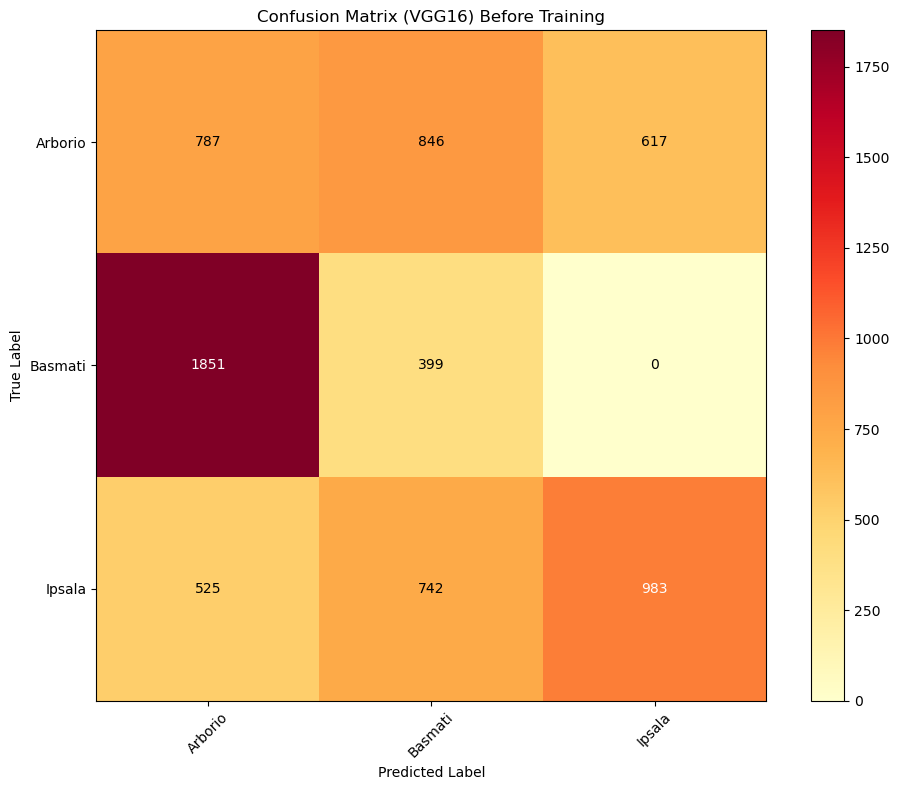

In [7]:
# *** Evaluate accuracy and confusion matrix BEFORE training ***
print("Evaluating before training...")

vgg16_y_true = []
vgg16_y_pred = []

for images, labels in test_generator:
    predictions = model_vgg16.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    vgg16_y_true.extend(labels.numpy())
    vgg16_y_pred.extend(predicted_labels.numpy())

# Confusion matrix and accuracy before training
vgg16_confusion_matrix_before = confusion_matrix(vgg16_y_true, vgg16_y_pred, labels=range(num_classes))
vgg16_f1_score_before = f1_score(vgg16_y_true, vgg16_y_pred, average='weighted')
vgg16_classification_report_before = classification_report(vgg16_y_true, vgg16_y_pred, target_names=class_names)

print("Confusion Matrix Before Training:\n", vgg16_confusion_matrix_before)
print("F1 Score Before Training:", vgg16_f1_score_before)
print("Classification Report Before Training:\n", vgg16_classification_report_before)

plt.figure(figsize=(10, 8))
plt.imshow(vgg16_confusion_matrix_before, interpolation='nearest', cmap=plt.cm.YlOrRd)
plt.title('Confusion Matrix (VGG16) Before Training')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

thresh = vgg16_confusion_matrix_before.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(vgg16_confusion_matrix_before[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if vgg16_confusion_matrix_before[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [8]:
history_vgg16 = model_vgg16.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
)


Epoch 1/5


985/985 [==============================] - 2961s 3s/step - loss: 0.0434 - accuracy: 0.9881 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 2/5
985/985 [==============================] - 4355s 4s/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0016 - val_accuracy: 0.9994
Epoch 3/5
985/985 [==============================] - 2716s 3s/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 4/5
985/985 [==============================] - 3196s 3s/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 5/5
985/985 [==============================] - 3130s 3s/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0034 - val_accuracy: 0.9994


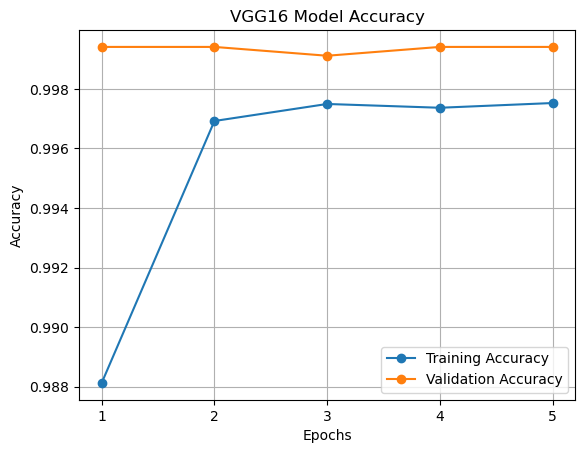

In [9]:
train_accuracy_vgg16 = history_vgg16.history['accuracy']
val_accuracy_vgg16 = history_vgg16.history['val_accuracy']

epochs_range = range(1, len(train_accuracy_vgg16) + 1)

plt.plot(epochs_range, train_accuracy_vgg16, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy_vgg16, label='Validation Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'{model_name} Model Accuracy')
plt.legend()

plt.xticks(range(1, len(train_accuracy_vgg16) + 1))

plt.grid(True)
plt.show()


In [10]:
print("Evaluating after training...")
vgg16_testing_scores = model_vgg16.evaluate(test_generator)
vgg16_testing_accuracy = vgg16_testing_scores[1]


Evaluating after training...
211/211 [==============================] - 522s 2s/step - loss: 5.9087e-04 - accuracy: 0.9996


Testing Accuracy (VGG16): 0.9995555281639099
F1 Score (VGG16): 0.9995555555116695
Classification Report After (VGG16):
               precision    recall  f1-score   support

     Arborio       1.00      1.00      1.00      2250
     Basmati       1.00      1.00      1.00      2250
      Ipsala       1.00      1.00      1.00      2250

    accuracy                           1.00      6750
   macro avg       1.00      1.00      1.00      6750
weighted avg       1.00      1.00      1.00      6750



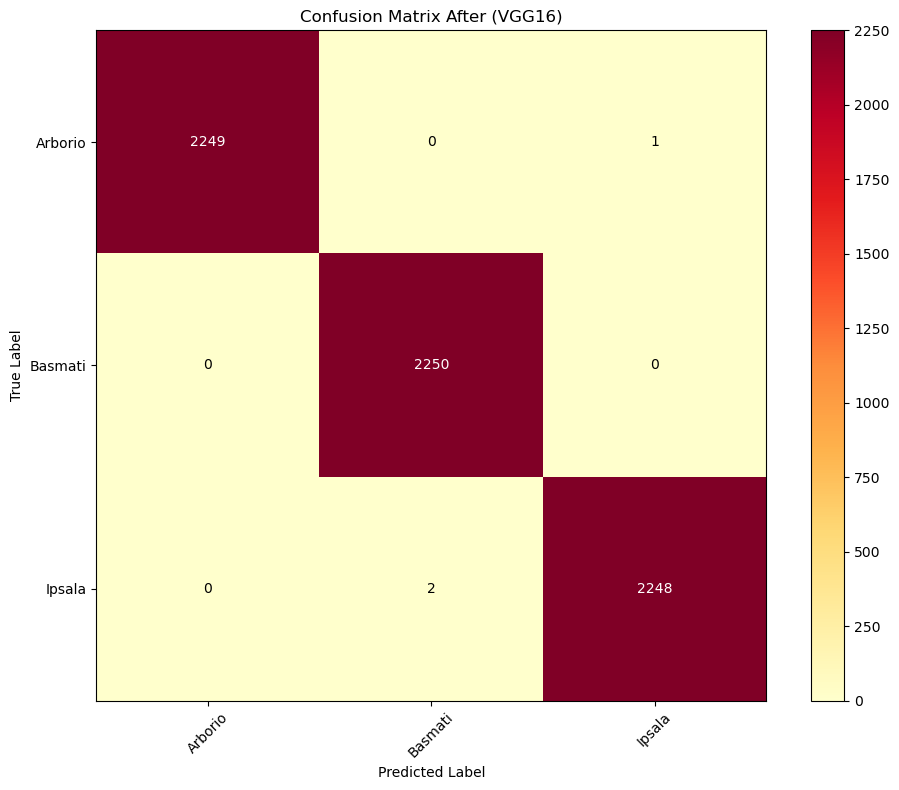

In [11]:
vgg16_y_true = []
vgg16_y_pred = []
for images, labels in test_generator:
    predictions = model_vgg16.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    vgg16_y_true.extend(labels.numpy())
    vgg16_y_pred.extend(predicted_labels.numpy())

vgg16_confusion_matrix = confusion_matrix(vgg16_y_true, vgg16_y_pred, labels=range(num_classes))

vgg16_f1_score = f1_score(vgg16_y_true, vgg16_y_pred, average='weighted')

vgg16_classification_report = classification_report(vgg16_y_true, vgg16_y_pred, target_names=class_names)

print("Testing Accuracy (VGG16):", vgg16_testing_accuracy)
print("F1 Score (VGG16):", vgg16_f1_score)
print("Classification Report After (VGG16):\n", vgg16_classification_report)

plt.figure(figsize=(10, 8))
plt.imshow(vgg16_confusion_matrix, interpolation='nearest', cmap=plt.cm.YlOrRd)
plt.title('Confusion Matrix After (VGG16)')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

thresh = vgg16_confusion_matrix.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(vgg16_confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if vgg16_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


##### **RESNET50 MODEL**

In [12]:
model_name = "ResNet50"
epochs = 5
desired_steps_per_epoch = 30

num_classes = len(train_generator.class_names)

base_model_resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(iz, iz, 3))

base_model_resnet50.trainable = False

model_resnet50 = tf_models.Sequential(
[
    base_model_resnet50,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])




In [13]:
# *** Evaluate accuracy and confusion matrix BEFORE training ***
print("Evaluating before training...")

resnet50_y_true = []
resnet50_y_pred = []

for images, labels in test_generator:
    predictions = model_resnet50.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    resnet50_y_true.extend(labels.numpy())
    resnet50_y_pred.extend(predicted_labels.numpy())

# Confusion matrix and accuracy before training
resnet50_confusion_matrix_before = confusion_matrix(resnet50_y_true, resnet50_y_pred, labels=range(num_classes))
resnet50_f1_score_before = f1_score(resnet50_y_true, resnet50_y_pred, average='weighted')
resnet50_classification_report_before = classification_report(resnet50_y_true, resnet50_y_pred, target_names=class_names)

print("Confusion Matrix Before Training:\n", resnet50_confusion_matrix_before)
print("F1 Score Before Training:", resnet50_f1_score_before)
print("Classification Report Before Training:\n", resnet50_classification_report_before)

plt.figure(figsize=(10, 8))
plt.imshow(resnet50_confusion_matrix_before, interpolation='nearest', cmap=plt.cm.YlOrRd)
plt.title('Confusion Matrix (ResNet50) Before Training')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

thresh = resnet50_confusion_matrix_before.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(resnet50_confusion_matrix_before[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if resnet50_confusion_matrix_before[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


Evaluating before training...


KeyboardInterrupt: 

In [14]:
history_resnet50 = model_resnet50.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
)


Epoch 1/5
145/145 [==============================] - 411s 3s/step - loss: 0.5357 - accuracy: 0.7961 - val_loss: 0.1699 - val_accuracy: 0.9448
Epoch 2/5
145/145 [==============================] - 403s 3s/step - loss: 0.1700 - accuracy: 0.9424 - val_loss: 0.1034 - val_accuracy: 0.9689
Epoch 3/5
145/145 [==============================] - 386s 3s/step - loss: 0.1054 - accuracy: 0.9631 - val_loss: 0.0666 - val_accuracy: 0.9829
Epoch 4/5
145/145 [==============================] - 363s 3s/step - loss: 0.0696 - accuracy: 0.9772 - val_loss: 0.0569 - val_accuracy: 0.9789
Epoch 5/5
145/145 [==============================] - 325s 2s/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0388 - val_accuracy: 0.9880


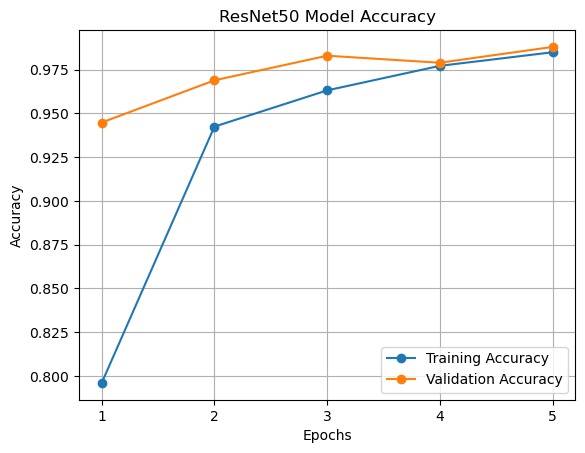

In [15]:
train_accuracy_resnet50 = history_resnet50.history['accuracy']
val_accuracy_resnet50 = history_resnet50.history['val_accuracy']

epochs_range = range(1, len(train_accuracy_resnet50) + 1)

plt.plot(epochs_range, train_accuracy_resnet50, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy_resnet50, label='Validation Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.legend()

plt.xticks(range(1, len(train_accuracy_resnet50) + 1))

plt.grid(True)
plt.show()


In [16]:
print("Evaluating after training...")
resnet50_testing_scores = model_resnet50.evaluate(test_generator)
resnet50_testing_accuracy = resnet50_testing_scores[1]


Evaluating after training...
32/32 [==============================] - 52s 2s/step - loss: 0.0335 - accuracy: 0.9910


Testing Accuracy After Training (ResNet-50): 0.9909547567367554
F1 Score After (ResNet-50): 0.9909670944867551
Classification Report After (ResNet-50):
                          precision    recall  f1-score   support

         Erenda_Healthy       1.00      0.98      0.99       199
  Erenda_Medium_Healthy       0.98      1.00      0.99       133
       Erenda_Unhealthy       1.00      1.00      1.00        94
       Nirgundi_Healthy       1.00      0.99      0.99       175
Nirgundi_Medium_Healthy       0.98      0.99      0.99       191
     Nirgundi_Unhealthy       0.99      0.99      0.99       203

               accuracy                           0.99       995
              macro avg       0.99      0.99      0.99       995
           weighted avg       0.99      0.99      0.99       995



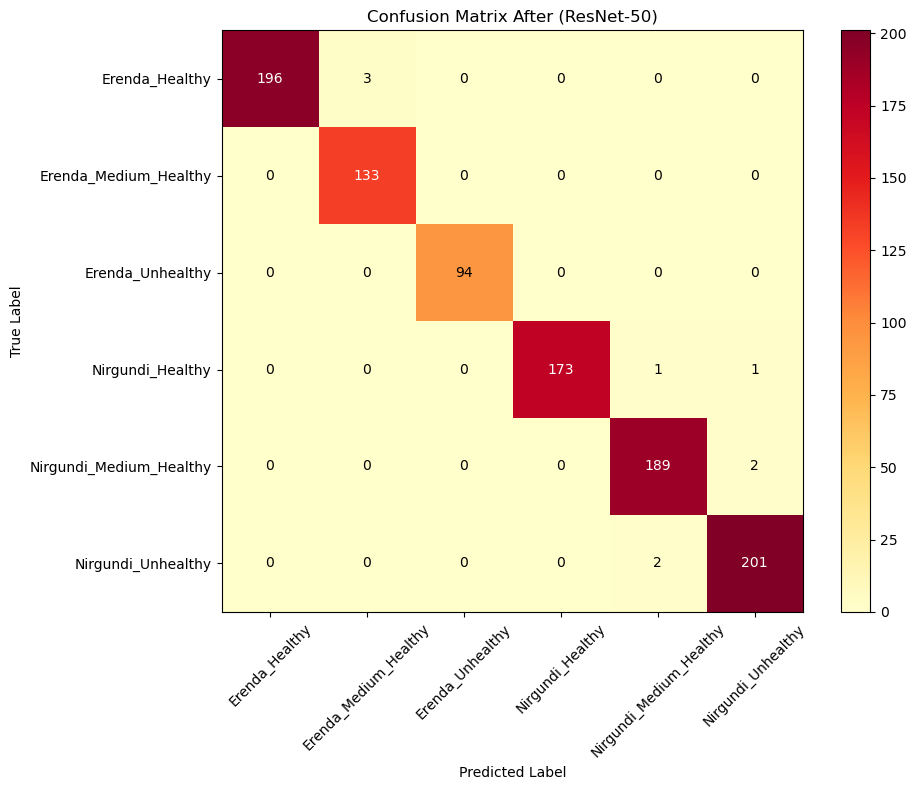

In [17]:
resnet50_y_true = []
resnet50_y_pred = []

for images, labels in test_generator:
    predictions = model_resnet50.predict(images, verbose=0)
    predicted_labels = tf.argmax(predictions, axis=1)
    resnet50_y_true.extend(labels.numpy())
    resnet50_y_pred.extend(predicted_labels.numpy())

resnet50_confusion_matrix = confusion_matrix(resnet50_y_true, resnet50_y_pred, labels=range(num_classes))

resnet50_f1_score = f1_score(resnet50_y_true, resnet50_y_pred, average='weighted')

resnet50_classification_report = classification_report(resnet50_y_true, resnet50_y_pred, target_names=class_names)

print("Testing Accuracy After Training (ResNet-50):", resnet50_testing_accuracy)
print("F1 Score After (ResNet-50):", resnet50_f1_score)
print("Classification Report After (ResNet-50):\n", resnet50_classification_report)

plt.figure(figsize=(10, 8))
plt.imshow(resnet50_confusion_matrix, interpolation='nearest', cmap=plt.cm.YlOrRd)
plt.title('Confusion Matrix After (ResNet-50)')
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)

thresh = resnet50_confusion_matrix.max() / 2.
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, format(resnet50_confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if resnet50_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


-------------------

In [1]:
import pandas as pd

# Data
data = {
    "Model": ["VGG16", "ResNet50"],
    "Before Training Accuracy": ["15%", "18%"],
    # "Before Training F1 Score": [0.06, 0.05, 0.03, 0.21, 0.10, 0.21, 0.10],
    
    "After Training Accuracy": ["98%", "98%"],
    # "After Training F1 Score": [0.98, 0.99, 0.60, 0.94, 0.61, 1.00, 0.99]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df.to_string(index=False))


         Model Before Training Accuracy After Training Accuracy
         VGG16                      15%                     98%
      ResNet50                      18%                     98%
   InceptionV3                      21%                     38%
   MobileNetV2                      18%                     88%
      Xception                      12%                     72%
EfficientNetB0                      19%                     99%
         VGG19                      14%                     99%


---------------------------